import all the relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import io
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [ ]:

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#**helper functions**

In [ ]:
def calcCrossValidation_Matrix(model, df, predictors, outcome):

  total_tp = 0
  total_tn = 0
  total_fp = 0
  total_fn = 0

  # Perform k-fold cross-validation with 10 folds
  kf = KFold(n_splits=df.shape[0])
  accuracy = []
  for train, test in kf.split(df):
      # print("1")

      # Filter training data
      train_predictors = (df[predictors].iloc[train, :])
      # The target we're using to train the algorithm.
      train_target = df[outcome].iloc[train]
      # print("1")

      test_predictors = (df[predictors].iloc[test, :])
      # The target we're using to train the algorithm.
      test_target = df[outcome].iloc[test]
      # print("1")


      # Training the algorithm using the predictors and target.
      model.fit(train_predictors, train_target)
      predictions = model.predict(test_predictors)
      # cm = confusion_matrix(test_target, predictions)
      # print(cm)
      # print("1")
      # print("test_target")
      test_target = test_target.to_numpy()
      # print(test_target)
      # np.array(df[outcome].values.tolist())
      # print(type(test_target))
      # print("predictions")
      # print(predictions)
      # print(type(predictions))

      tn, fp, fn, tp = perf_measure(test_target, predictions)
      # print("1")

      total_tp += tp
      total_tn += tn
      total_fp += fp
      total_fn += fn

  # print(total_tn, total_fp, total_fn, total_tp)
  return total_tn, total_fp, total_fn, total_tp 

In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1
    # print(TN, FP, FN, TP)
    return(TN, FP, FN, TP)

In [ ]:
def calc_specificity(tn, fp, fn, tp):
  return tn / (tn +fp)

In [ ]:
def calc_sensitivity(tn, fp, fn, tp):
  return tp / (tp +fn)


# **ALL patients (treated + untreated) Livnat**



In [ ]:
# categorical_features = categorical_features

In [ ]:
df_all_treated = pd.read_pickle("/content/gdrive/My Drive/Colab Notebooks/MS_Notebooks/df_Livnat_all_patients.pkl")

# df_all_treated = pd.get_dummies(df_all_treated, columns=categorical_features, drop_first=True)
# df_all_treated.drop(['treatment_when_sample_was_taken', 'sample_code'], axis='columns', inplace=True)
df_all_treated.rename(columns={'1_years_EDSS_from_sample_date': '1 year EDSS'}, inplace=True)

df_all_treated

In [ ]:
def min_max_normalize_features(dataframe, numeric_list):
    for num_feature in numeric_list:
        dataframe[num_feature] = (dataframe[num_feature] - dataframe[num_feature].min()) / (
                dataframe[num_feature].max() - dataframe[num_feature].min())
    return dataframe

In [ ]:
numeric_features = ['TIM3_RQ', 'TIGIT_RQ','LAG3_RQ','age_at_diagnosis','MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells']
df_all_treated = min_max_normalize_features(df_all_treated, numeric_features)
df_all_treated

all features

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000, random_state=42)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))


0.8863636363636364
0.75


0.8636363636363636
0.6458333333333334
Feature ranking:
1. feature 11 1 year EDSS (0.332992)
2. feature 4 primary_EDSS_at_diagnosis (0.160152)
3. feature 1 TIGIT_RQ (0.098329)
4. feature 5 MRI_lesion_mass (0.097331)
5. feature 0 TIM3_RQ (0.092861)
6. feature 3 age_at_diagnosis (0.089213)
7. feature 2 LAG3_RQ (0.053974)
8. feature 8 Cells (0.027823)
9. feature 6 Lymph_Cells (0.017667)
10. feature 9 gender_M (0.014918)
11. feature 7 PMN_Cells (0.008641)
12. feature 10 oligoclonal_band_POS (0.006101)


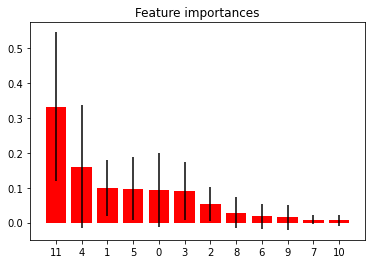

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto')
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(predictor_var1)):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], predictor_var1[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictor_var1)), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(len(predictor_var1)), indices)
plt.xlim([-1, len(predictor_var1)])
plt.show()

no genes

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000)
predictor_var1 = ['age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8977272727272727
0.75


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto')
predictor_var1 = ['age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8409090909090909
0.7291666666666666


no TIM3

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000)
predictor_var1 = ['TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))


0.8863636363636364
0.75


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto')
predictor_var1 = ['TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8636363636363636
0.7083333333333334


no TIGIT_RQ

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000)
predictor_var1 = ['TIM3_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8863636363636364
0.75


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto')
predictor_var1 = ['TIM3_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8409090909090909
0.7291666666666666


no LAG3

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8863636363636364
0.75


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto')
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.875
0.6666666666666666


no TIM3 and LAG3

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000)
predictor_var1 = ['TIGIT_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))


0.8863636363636364
0.75


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto')
predictor_var1 = ['TIGIT_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8409090909090909
0.6458333333333334


no TIM3 and TIGIT

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000)
predictor_var1 = ['LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))


0.8863636363636364
0.75


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto')
predictor_var1 = ['LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8295454545454546
0.7083333333333334


no LAG3 and TIGIT

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000)
predictor_var1 = ['TIM3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

coefficients = pd.concat([pd.DataFrame(predictor_var1), pd.DataFrame(np.transpose(logisticRegrDF.coef_))], axis=1)
coefficients.columns = ['feature_name', 'coefficient_val']
coefficients = coefficients.sort_values(by=['coefficient_val'], ascending=False)
coefficients.to_excel('coef_no_abs.xlsx')
coefficients['coefficient_val'] = coefficients['coefficient_val'].abs()

coefficients = coefficients.sort_values(by=['coefficient_val'], ascending=False)
coefficients.to_excel('coef_abs.xlsx')

print(coefficients)


0.8863636363636364
0.75
                feature_name  coefficient_val
0                    TIM3_RQ         1.166721
9                1 year EDSS         1.159134
5                  PMN_Cells         0.549793
7                   gender_M         0.531026
3            MRI_lesion_mass         0.246698
1           age_at_diagnosis         0.177298
6                      Cells         0.176128
4                Lymph_Cells         0.113509
2  primary_EDSS_at_diagnosis         0.055284
8       oligoclonal_band_POS         0.054741


In [ ]:
df_all_treated.shape

(136, 16)

In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto')
predictor_var1 = ['TIM3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
importances = rf.feature_importances_
print(importances)

0.8522727272727273
0.7083333333333334
[0.07081892 0.12838141 0.10871598 0.08051892 0.03353335 0.01902472
 0.04626413 0.01832211 0.00237515 0.49204531]


no MRI

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS' 
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

coefficients = pd.concat([pd.DataFrame(predictor_var1), pd.DataFrame(np.transpose(logisticRegrDF.coef_))], axis=1)
coefficients.columns = ['feature_name', 'coefficient_val']
coefficients = coefficients.sort_values(by=['coefficient_val'], ascending=False)
coefficients.to_excel('coef_no_abs.xlsx')
coefficients['coefficient_val'] = coefficients['coefficient_val'].abs()

coefficients = coefficients.sort_values(by=['coefficient_val'], ascending=False)
coefficients.to_excel('coef_abs.xlsx')

print(coefficients)


0.8977272727272727
0.75
                 feature_name  coefficient_val
0                     TIM3_RQ         1.179891
10                1 year EDSS         1.160797
6                   PMN_Cells         0.549816
8                    gender_M         0.522954
7                       Cells         0.168282
3            age_at_diagnosis         0.164748
1                    TIGIT_RQ         0.141690
5                 Lymph_Cells         0.122369
9        oligoclonal_band_POS         0.065996
4   primary_EDSS_at_diagnosis         0.050437
2                     LAG3_RQ         0.010292


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto')
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8522727272727273
0.7291666666666666


no OCB

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8863636363636364
0.75


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto')
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','Cells','gender_M', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.875
0.7291666666666666


no cells

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8863636363636364
0.75


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto')
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8636363636363636
0.7083333333333334


no lymph cells

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8863636363636364
0.75


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto')
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.875
0.7083333333333334


no PMM cells

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8863636363636364
0.75


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto')
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.875
0.7291666666666666


no MRI, cells

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8977272727272727
0.75


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto')
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.875
0.7083333333333334


no MRI, PMM cells

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000)
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis','Lymph_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8863636363636364
0.75


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto')
predictor_var1 = ['TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis','Lymph_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8636363636363636
0.7083333333333334


no TIGIT, cells

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000)
predictor_var1 = ['TIM3_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8863636363636364
0.75


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto')
predictor_var1 = ['TIM3_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','PMN_Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8636363636363636
0.7083333333333334


no TIGIT, pmm cells

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000)
predictor_var1 = ['TIM3_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.875
0.75


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto')
predictor_var1 = ['TIM3_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass','Lymph_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.875
0.7083333333333334


no MRI, LAG3

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000)
predictor_var1 = ['TIM3_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis','Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8977272727272727
0.75


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto')
predictor_var1 = ['TIM3_RQ', 'LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8863636363636364
0.6875


no MRI, TIM3, LAG3

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000)
predictor_var1 = ['TIGIT_RQ', 'age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8977272727272727
0.75


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto')
predictor_var1 = ['TIGIT_RQ', 'age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8636363636363636
0.6875


no MRI, TIM3, TIGIT

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000)
predictor_var1 = ['LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8977272727272727
0.75


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto')
predictor_var1 = ['LAG3_RQ','age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8636363636363636
0.6875


no MRI, TIGIT, LAG3

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000)
predictor_var1 = ['TIM3_RQ', 'age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8977272727272727
0.75


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto')
predictor_var1 = ['TIM3_RQ', 'age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'Lymph_Cells','PMN_Cells','Cells','gender_M','oligoclonal_band_POS', '1 year EDSS']
outcome_var = 'diagnosis_SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_all_treated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8522727272727273
0.7083333333333334
